In [105]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [106]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [107]:
print('length of train dataset {}'.format(len(train_df)))
print('length of test dataset {}'.format(len(test_df)))

length of train dataset 891
length of test dataset 418


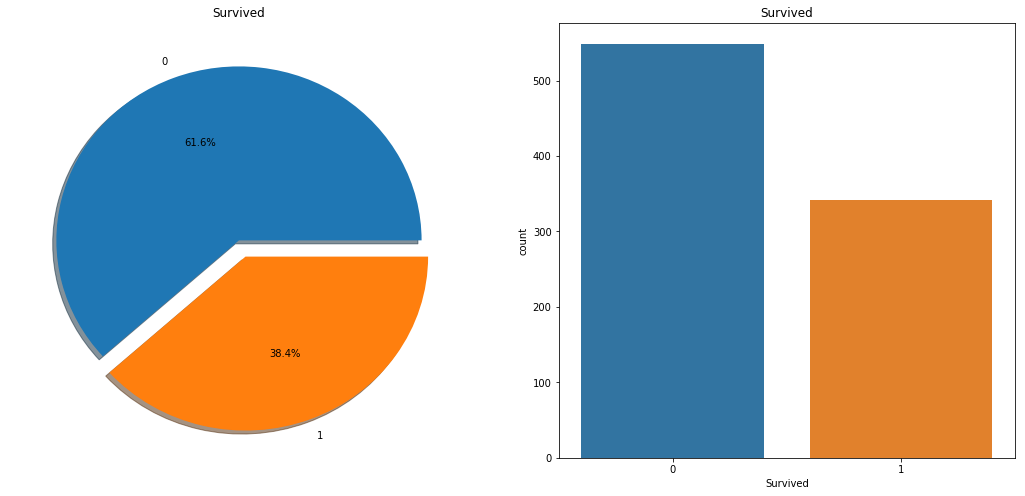

In [108]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [109]:
dataset = pd.concat([train_df,test_df],axis=0,sort=False)
print('length of total dataset {}'.format(len(dataset)))

length of total dataset 1309


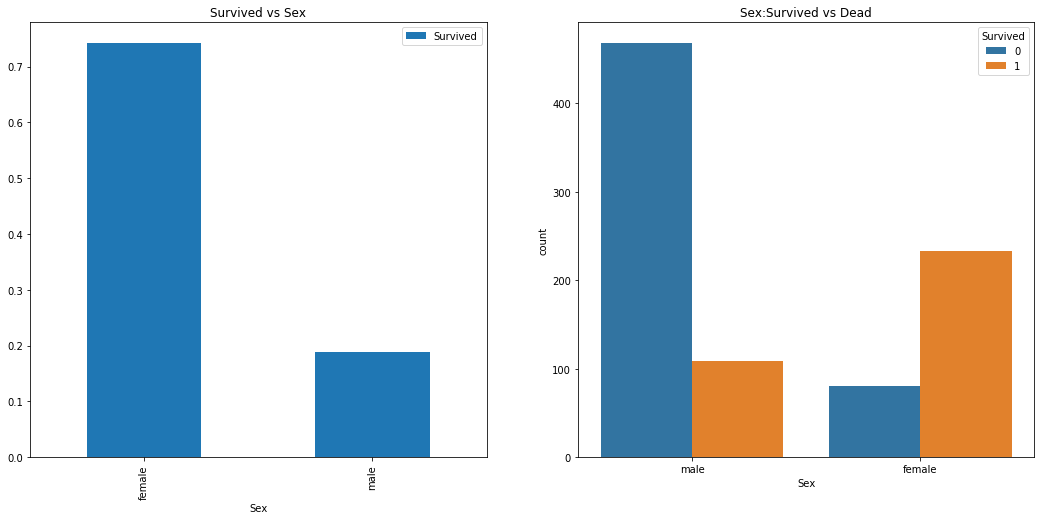

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

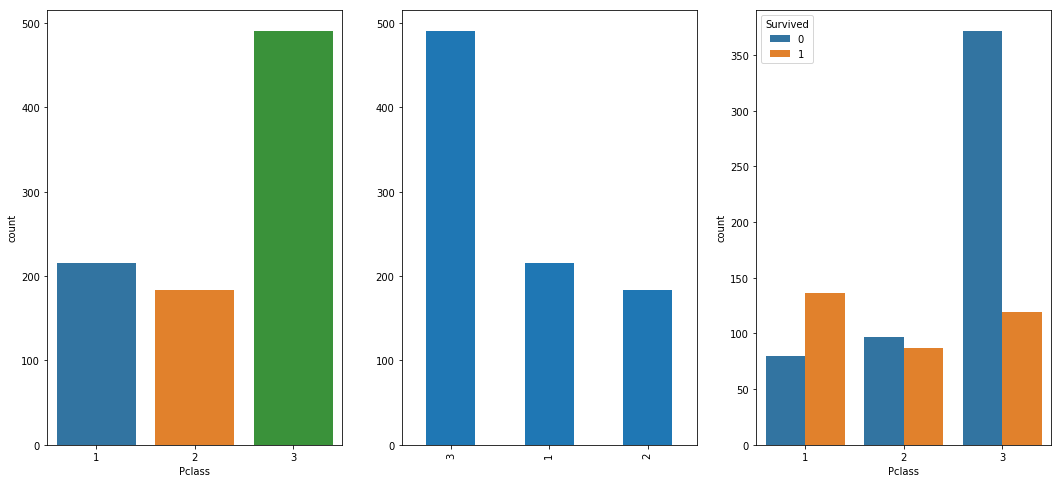

In [111]:
f,ax = plt.subplots(1,3,figsize=(18,8))
sns.countplot('Pclass',data=train_df,ax=ax[0])
train_df['Pclass'].value_counts().plot.bar(ax=ax[1])
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[2])


plt.show()

In [112]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

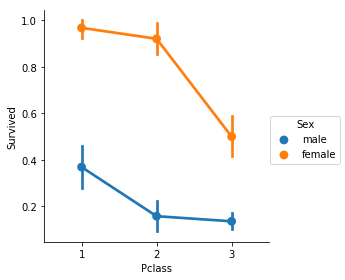

In [122]:
sns.factorplot('Pclass','Survived',hue='Sex' ,data=train_df)
plt.show()

In [146]:
train_df.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [116]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [75]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

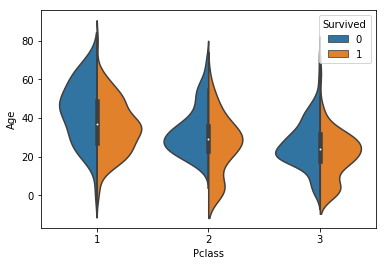

In [139]:
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True)


In [145]:
pd.crosstab(train_df.Sex,train_df.Survived).T.style.background_gradient(cmap='summer_r')

Sex,female,male
Survived,,
0,81,468
1,233,109


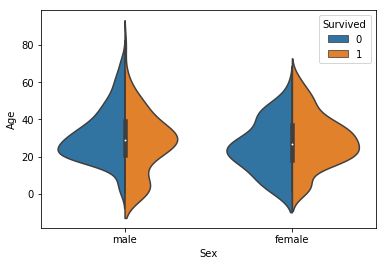

In [136]:
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True)

In [76]:
# cabin - has large number of null values and more unique values so we will remove it
# Age , Embarked , Fare - we have to fill the missing values
# survived - target variable and the missing values from test dataset so this will be skipped

dataset.drop(['Cabin'],axis=1,inplace=True)
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)


In [77]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [78]:
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [79]:
# Name won't help for prediction but extracting tile and creating a new feature will help the predictions
dataset['Title'] = dataset['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
min_occ_title = dataset['Title'].value_counts() < 10
dataset['Title'] = dataset['Title'].apply(lambda x:'Misc' if min_occ_title[x] else x)
dataset['Title'].unique()
dataset.drop(['Name'],axis=1,inplace=True)

In [80]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# train_df['isAlone'] = 0 if train_df['Family_size'] > 1 else 1
dataset['isAlone'] = 1
# train_df.loc[train_df['Family_size'] > 1,'isAlone'] = 0
dataset.loc[dataset['FamilySize'] > 1,'isAlone'] = 0 
# dataset.drop(['FamilySize'],axis=1,inplace=True)

In [81]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title', 'FamilySize', 'isAlone'],
      dtype='object')

In [82]:
dataset['isAlone'].unique()

array([0, 1], dtype=int64)

In [83]:
dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
dataset['AgeBin'] = pd.cut(dataset['Age'], 5)

In [84]:
dataset.columns
dataset.dtypes[dataset.dtypes == 'object']

Sex         object
Ticket      object
Embarked    object
Title       object
dtype: object

In [85]:
dataset.drop(['Ticket'],axis=1,inplace=True)

In [86]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'FamilySize', 'isAlone', 'FareBin',
       'AgeBin'],
      dtype='object')

In [87]:
# dataset.drop(['Age','Parch','SibSp','Fare'],axis=1,inplace=True)

In [88]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'FamilySize', 'isAlone', 'FareBin',
       'AgeBin'],
      dtype='object')

In [89]:
# Explatory Analaysis

# correleation

col_eda = ['Sex','Title','Embarked','Pclass','Embarked','SibSp','Parch','isAlone']
for val in col_eda:
    print('Survival correlation by {}'.format(val))
    print(dataset[[val,'Survived']].groupby(val,as_index=False).mean())
    print("-----"*20)


Survival correlation by Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------------------------------------------------------------------------
Survival correlation by Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
----------------------------------------------------------------------------------------------------
Survival correlation by Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
----------------------------------------------------------------------------------------------------
Survival correlation by Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
Survival correlation by Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------

In [90]:
# cross tab
for val in col_eda:
    print('Survival correlation by {}'.format(val))
    print(pd.crosstab(dataset[val],dataset['Survived']))
    print("-----"*20)


Survival correlation by Sex
Survived  0.0  1.0
Sex               
female     81  233
male      468  109
----------------------------------------------------------------------------------------------------
Survival correlation by Title
Survived  0.0  1.0
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99
----------------------------------------------------------------------------------------------------
Survival correlation by Embarked
Survived  0.0  1.0
Embarked          
C          75   93
Q          47   30
S         427  219
----------------------------------------------------------------------------------------------------
Survival correlation by Pclass
Survived  0.0  1.0
Pclass            
1          80  136
2          97   87
3         372  119
----------------------------------------------------------------------------------------------------
Survival correlation by Embarked
Survived  0.0  1.0
Embarked          
C   

In [91]:
# observations
for val in col_eda:
    print('Highest percentage survival by {}'.format(val))
    val_count = dataset[dataset['Survived'] == 1][val].value_counts(normalize=True)*100
    print("{:.2f}% of people who comes under {} survived".format(val_count.iloc[0],val_count.index[0]))
#     print(val_count.iloc[0])
    print("-----"*20)

Highest percentage survival by Sex
68.13% of people who comes under female survived
----------------------------------------------------------------------------------------------------
Highest percentage survival by Title
37.13% of people who comes under Miss survived
----------------------------------------------------------------------------------------------------
Highest percentage survival by Embarked
64.04% of people who comes under S survived
----------------------------------------------------------------------------------------------------
Highest percentage survival by Pclass
39.77% of people who comes under 1 survived
----------------------------------------------------------------------------------------------------
Highest percentage survival by Embarked
64.04% of people who comes under S survived
----------------------------------------------------------------------------------------------------
Highest percentage survival by SibSp
61.40% of people who comes under 0 survi

In [92]:
dataset.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'FamilySize', 'isAlone', 'FareBin',
       'AgeBin'],
      dtype='object')

In [93]:
col_label_converter = ['Sex','Title','Embarked','AgeBin','FareBin']
label = LabelEncoder()
for col in col_label_converter:
    dataset[col] = label.fit_transform(dataset[col])
dataset = pd.get_dummies(data=dataset,columns=col_label_converter,drop_first = True)

In [94]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'isAlone', 'Sex_1', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Embarked_1', 'Embarked_2', 'AgeBin_1', 'AgeBin_2',
       'AgeBin_3', 'AgeBin_4', 'FareBin_1', 'FareBin_2', 'FareBin_3'],
      dtype='object')

In [95]:
dataset.drop(['PassengerId','Age','SibSp','Parch','Fare','FamilySize'],inplace=True,axis=1)

In [96]:
train_df = dataset.iloc[:891]
test_df = dataset.iloc[891:]
train_df.columns

Index(['Survived', 'Pclass', 'isAlone', 'Sex_1', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Embarked_1', 'Embarked_2', 'AgeBin_1',
       'AgeBin_2', 'AgeBin_3', 'AgeBin_4', 'FareBin_1', 'FareBin_2',
       'FareBin_3'],
      dtype='object')

In [97]:
#create table to compare MLA predictions
MLA_predict = train_df['Survived']
train_df = train_df.drop('Survived',axis=1)
len(MLA_predict)

891

In [98]:
from sklearn import ensemble,linear_model,naive_bayes,tree,discriminant_analysis,svm,neighbors,model_selection
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
     XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_df,MLA_predict,cv  = cv_split)
#     print(cv_results)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()

    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_df,MLA_predict)
#     MLA_predict[MLA_name] = alg.predict(test_df)
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare[0].predict(MLA_predict)
#MLA_predict


KeyError: 0

In [ ]:
test_df = test_df.drop('Survived',axis=1)

In [ ]:
predictions = MLA[MLA_compare.index[0]].predict(test_df)

In [ ]:
submission = pd.read_csv("gender_submission.csv")

In [ ]:
submission.columns

In [ ]:
submission['Survived'] = predictions

In [ ]:
submission

In [ ]:
submission.to_csv("gender_submission.csv",index=False)